In [56]:
import pandas as pd
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn import tree   

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [57]:
df = pd.read_csv('titanic-passengers.csv', sep=';')
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [58]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)

In [59]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)   
y_pred=model.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


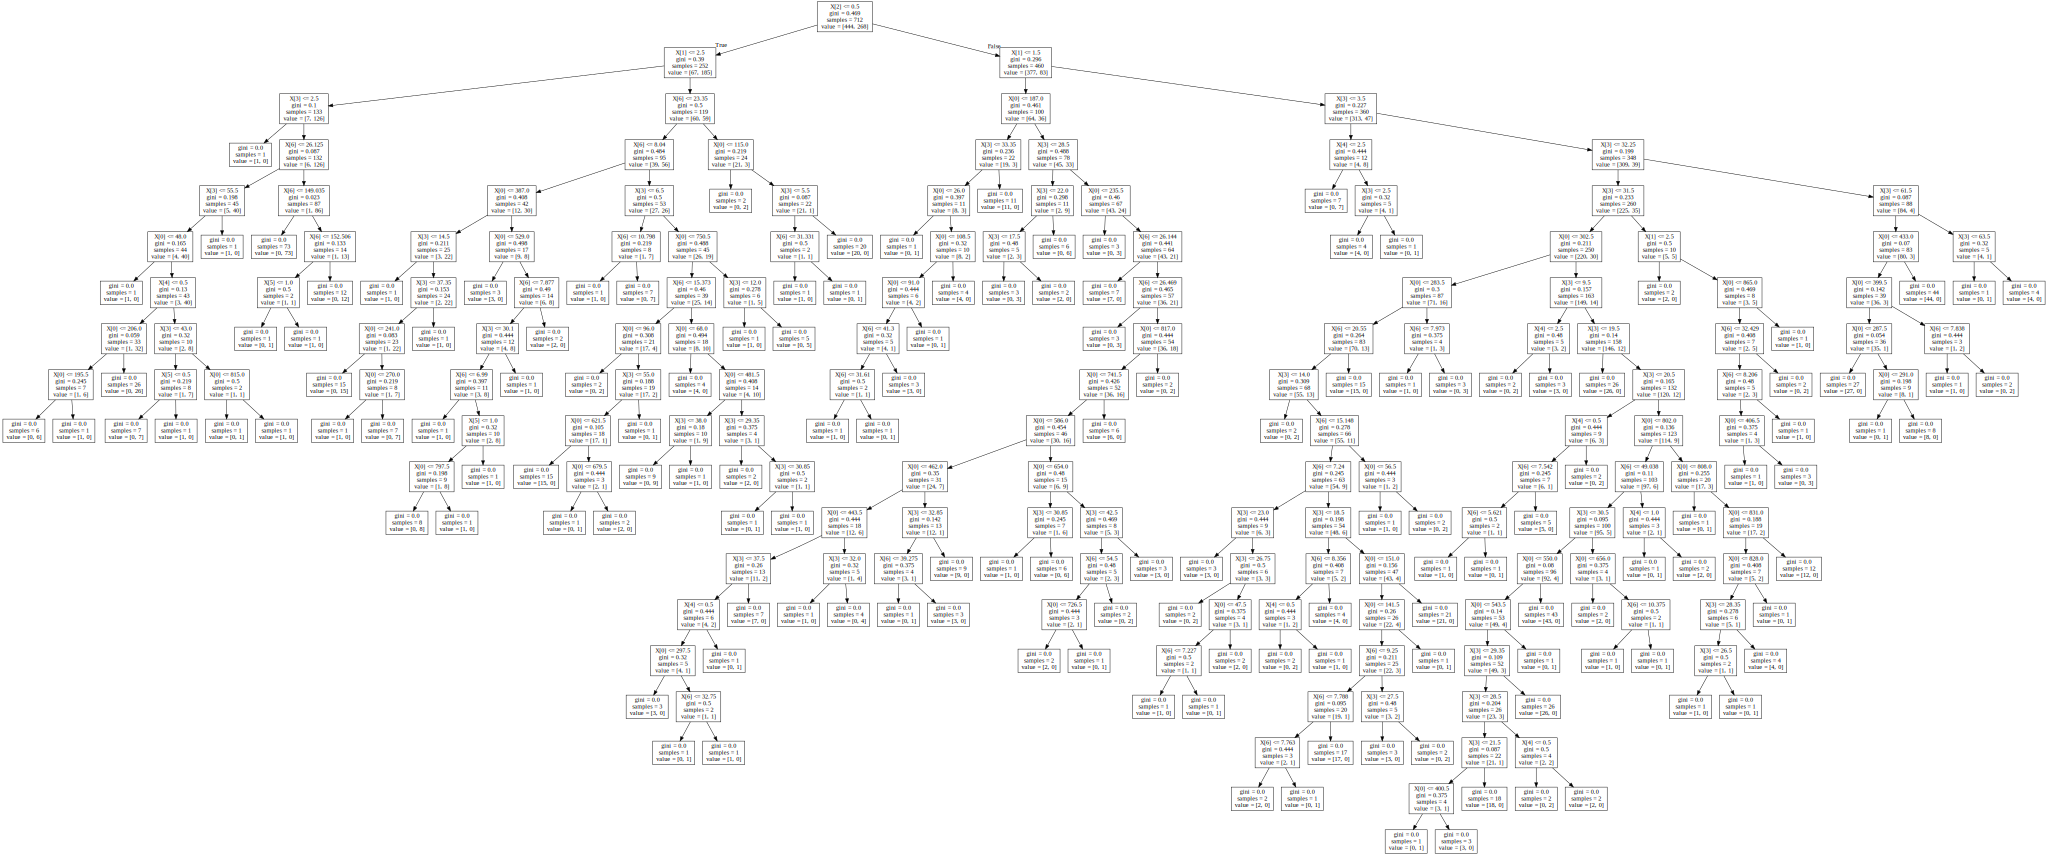

In [60]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [61]:
dtree = tree.DecisionTreeClassifier(criterion ="gini",splitter= 'random',max_leaf_nodes =10, min_samples_leaf= 5, max_depth= 5)

In [62]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

iris = datasets.load_iris()

data=pd.DataFrame({
'sepal length': iris.data[:,0],
'sepal width': iris.data[:,1],
'petal length': iris.data[:,2],
'petal width': iris.data[:,3], 
'species': iris.target
})

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] 
y=data['species']
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) 

In [63]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

clf=RandomForestClassifier(criterion="gini", n_estimators=10, max_depth=3) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  


Accuracy: 0.9333333333333333


In [64]:
clf=RandomForestClassifier(criterion="gini", n_estimators=5, max_depth=3) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  


Accuracy: 0.8888888888888888
